In [ ]:
# Created by Anja Katzenberger (anja.katzenberger@pik-potsdam.de)

# This code provides insights into the meridional profile of key climate variables throughout the year.
# Thus it takes the average over all longitudes and plots the zonal mean of the variable of interest.

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Where to save the output
savedir = "C:\\Users\\UserX\\Figures"

# Directory of data sets
#(depending on your research question, it might be beneficial to use the 20-year mean as input data or individual years)
data_dir = 'C:/Users/UserX/data/'


In [ ]:

#%%###  LOAD DATA
#-------------------

# List of simulations
# If you only want to analyse one simulation, you can fill a single entry
# If you have several simulations with varying setups, as e.g. varying CO2 concentration, aerosol levels, albedo, etc., you can fill several entries 

simulations_list = [50,100,200,500] 


# Initialize dictionaries to store the data for each simulation
ds_dict = {}

pr = {}
sw = {}
tsurf = {}
evap = {}
wvp = {}
rh = {}

for simulation in simulation_list:
    # Load the dataset
    ds_dict[simulation] = xr.open_dataset(f'{data_dir}Basesimulation_with_variationX_{simulation}.nc') # adapt the name of the file according to your file name
    
    # Extract the variables, adapt the names according to the names in your file
    sw[simulation] = ds_dict[simulation]['swdn_toa']
    tsurf[simulation] = ds_dict[simulation]['t_surf']-273.15
    pr[simulation] = ds_dict[simulation]['precip']*86400
    evap[simulation] = ds_dict[simulation]['evap']*86400
    wvp[simulation] = ds_dict[simulation]['WVP']
    rh[simulation] = ds_dict[simulation]['rh']






c:\Users\anjaka\Nextcloud\PhD\03_MonsoonPlanet_Hysteresis\Codes\venv\Lib\site-packages\xarray\coding\times.py:167: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
c:\Users\anjaka\Nextcloud\PhD\03_MonsoonPlanet_Hysteresis\Codes\venv\Lib\site-packages\xarray\coding\times.py:167: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
c:\Users\anjaka\Nextcl

In [5]:

#%%###  PROCESSING DATA
#---------------------------
# Inorder to plot weighted means of specific areas/heigths, the data needs to be processed accordingly.

# Select latitude ranges that are of particular interest for your research question

# Equatorial Region
l_m= -10  # lower latitude
u_m = 10 # upper latitude

# Global (g)
l_g = -90
u_g = 90

## In case you are interested in a specific height range, you can define a slice for the height  
# Define the height slice
slice_h = slice(300, 1000)


# Define the latitude slices
slice_m = slice(l_m, u_m)
slice_g = slice(l_g, u_g)

# M
sw_m = {}
tsurf_m = {}
pr_m = {}
evap_m = {}
wvp_m = {}
rh_m = {}

sw_m_z = {}
tsurf_m_z = {}
pr_m_z = {}
evap_m_z = {}
wvp_m_z = {}
rh_m_z = {}

sw_m_z_mean = {}
tsurf_m_z_mean = {}
pr_m_z_mean = {}
evap_m_z_mean = {}
wvp_m_z_mean = {}
rh_m_z_mean = {}

rh_m_z_mean_hslice = {}
rh_m_z_mean_h = {}


for simulation in simulations_list:
    sw_m[simulation] = sw[simulation].sel(lat=slice_m)
    tsurf_m[simulation] = tsurf[simulation].sel(lat=slice_m)
    pr_m[simulation] = pr[simulation].sel(lat=slice_m)
    evap_m[simulation] = evap[simulation].sel(lat=slice_m)
    wvp_m[simulation] = wvp[simulation].sel(lat=slice_m)
    rh_m[simulation] = rh[simulation].sel(lat=slice_m)

    sw_m_z[simulation] = sw_m[simulation].mean('lon')
    tsurf_m_z[simulation] = tsurf_m[simulation].mean('lon') 
    pr_m_z[simulation] = pr_m[simulation].mean('lon')
    evap_m_z[simulation] = evap_m[simulation].mean('lon')
    wvp_m_z[simulation] = wvp_m[simulation].mean('lon')
    rh_m_z[simulation] = rh_m[simulation].mean('lon')

    weights = np.cos(np.deg2rad(sw[simulation].lat))
    sw_m_z_mean[simulation] = sw_m_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(tsurf[simulation].lat))
    tsurf_m_z_mean[simulation] = tsurf_m_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(pr[simulation].lat))
    pr_m_z_mean[simulation] = pr_m_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(evap[simulation].lat))
    evap_m_z_mean[simulation] = evap_m_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(wvp[simulation].lat))
    wvp_m_z_mean[simulation] = wvp_m_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(rh[simulation].lat))
    rh_m_z_mean[simulation] = rh_m_z[simulation].weighted(weights).mean(dim=['lat'])



# in case you want to select specific height ranges, adapt "pfull" with the name of the height dimension in your file
for simulation in simulations_list:
    # Select data within the specified height range
    rh_m_z_mean_hslice[simulation] = rh_m_z_mean[simulation].sel(pfull=slice_h)

    # Define weights. If the weights are not equal, replace this line with the correct weights.
    weights = xr.DataArray(np.ones_like(rh_m_z_mean_hslice[simulation].pfull), coords=[rh_m_z_mean_hslice[simulation].pfull])

    # Calculate the weighted mean over the height dimension
    rh_m_z_mean_h[simulation] = rh_m_z_mean_hslice[simulation].weighted(weights).mean(dim='pfull')


# G
sw_g = {}
tsurf_g = {}
pr_g = {}
evap_g = {}
wvp_g = {}

sw_g_z = {}
tsurf_g_z = {}
pr_g_z = {}
evap_g_z = {}
wvp_g_z = {}

sw_g_z_mean = {}
tsurf_g_z_mean = {}
pr_g_z_mean = {}
evap_g_z_mean = {}
wvp_g_z_mean = {}


# Process the data for each simulation
for simulation in simulations_list:
    sw_g[simulation] = sw[simulation].sel(lat=slice_g)
    tsurf_g[simulation] = tsurf[simulation].sel(lat=slice_g)
    pr_g[simulation] = pr[simulation].sel(lat=slice_g)
    evap_g[simulation] = evap[simulation].sel(lat=slice_g)
    wvp_g[simulation] = wvp[simulation].sel(lat=slice_g)

    sw_g_z[simulation] = sw_g[simulation].mean('lon')
    tsurf_g_z[simulation] = tsurf_g[simulation].mean('lon') 
    pr_g_z[simulation] = pr_g[simulation].mean('lon')
    evap_g_z[simulation] = evap_g[simulation].mean('lon')
    wvp_g_z[simulation] = wvp_g[simulation].mean('lon')

    weights = np.cos(np.deg2rad(sw[simulation].lat))
    sw_g_z_mean[simulation] = sw_g_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(tsurf[simulation].lat))
    tsurf_g_z_mean[simulation] = tsurf_g_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(pr[simulation].lat))
    pr_g_z_mean[simulation] = pr_g_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(evap[simulation].lat))
    evap_g_z_mean[simulation] = evap_g_z[simulation].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(wvp[simulation].lat))
    wvp_g_z_mean[simulation] = wvp_g_z[simulation].weighted(weights).mean(dim=['lat'])






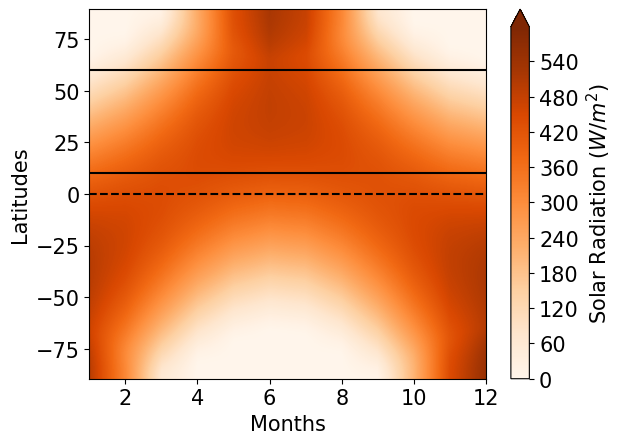

<Figure size 640x480 with 0 Axes>

In [43]:
#%%###  PLOT
#-------------------

### Meridional Contour Plot for showrtwave radiation
plt.figure()
plt.contourf(sw_g_z[50]['time.month'],sw_g_z[50]['lat'],sw_g_z[50].transpose(),cmap="Oranges",extend="max",levels = range(0,600))
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Solar Radiation $(W/m^2)$")
plt.show()
plt.savefig(savedir + '/sw_contourf_simulation50.pdf',bbox_inches = 'tight')



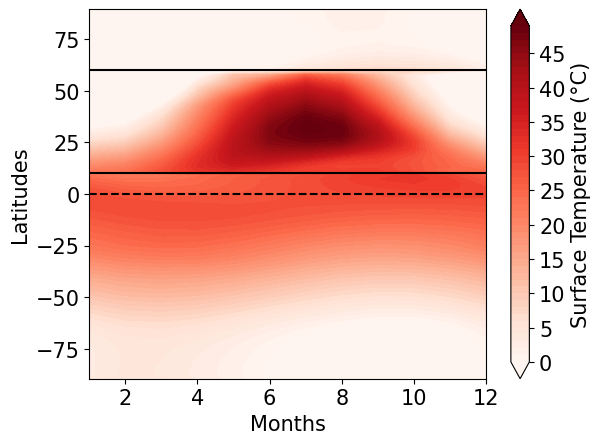

<Figure size 640x480 with 0 Axes>

In [44]:


### Meridional Contour Plot for surface temperature

plt.figure()
plt.contourf(tsurf_g_z[50]['time.month'],tsurf_g_z[50]['lat'],tsurf_g_z[50].transpose(),cmap="Reds",extend="both",levels = range(0,50))
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Surface Temperature (°C)")
plt.show()
plt.savefig(savedir + '/filename.pdf',bbox_inches = 'tight')


#



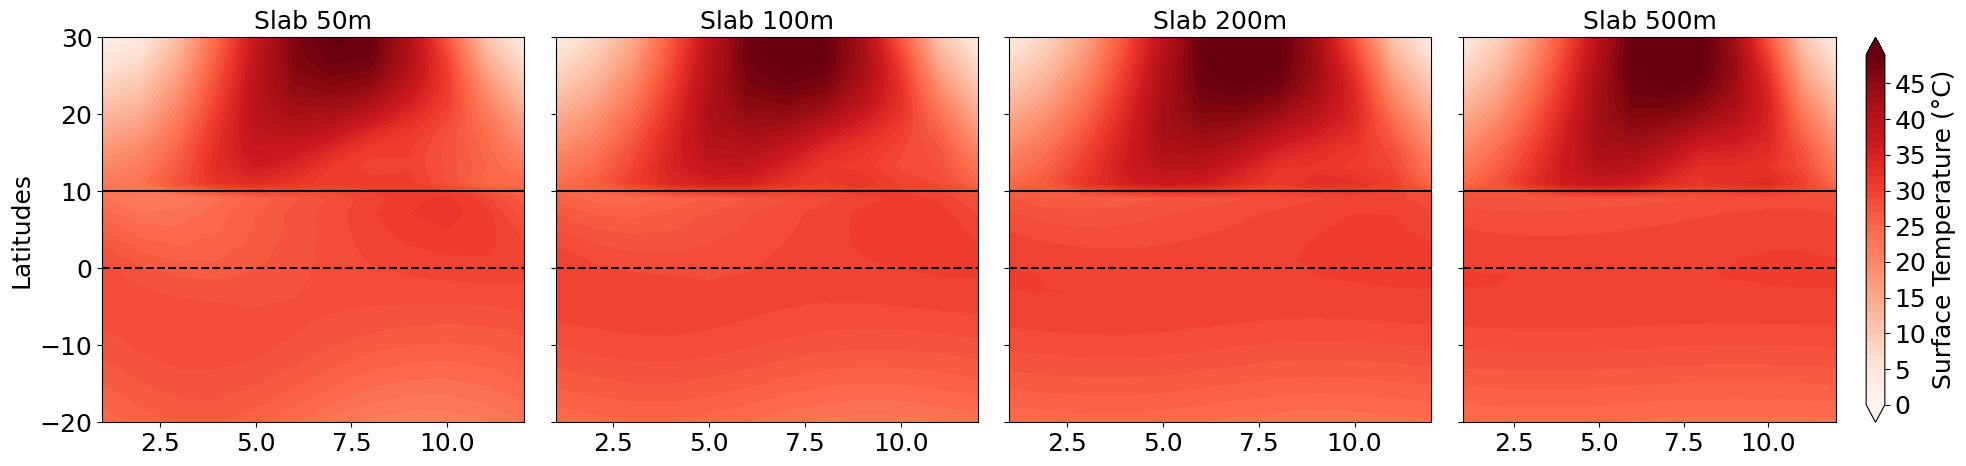

In [45]:
# Panel of 4 contour plots for surface temperature for different slab thicknesses

# Which latitudes do you want to display (ylim)
low = -20
up = 30

plt.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# Plot for slab50
for i in range(0,4):
    contourf1 = axs[i].contourf(tsurf_g_z[simulations_list[i]]['time.month'],tsurf_g_z[simulations_list[i]]['lat'],tsurf_g_z[simulations_list[i]].transpose(), cmap="Reds", extend="both", levels=range(0, 50))
   # axs[i].set_xlabel("Months")
    if i == 0:
        axs[i].set_ylabel("Latitudes", fontsize=18)
    axs[i].axhline(0, color="black", linestyle='--')
    axs[i].axhline(10, color="black")
    axs[i].axhline(60, color="black")
    axs[i].set_title("Simulation_ " + str(simulations_list[i]), fontsize=18)
    axs[i].set_ylim(low, up)


# Create an axes on the right side of axs. The width of cax will be 5%
# of axs and the padding between cax and axs will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.3)

#Create the colorbar
cbar = fig.colorbar(contourf1, cax=cax, orientation='vertical')

# Set the label for the colorbar and specify the font size
cbar.set_label("Surface Temperature (°C)", size=18)

plt.tight_layout()  
plt.savefig(savedir + '/filename.pdf',bbox_inches = 'tight')



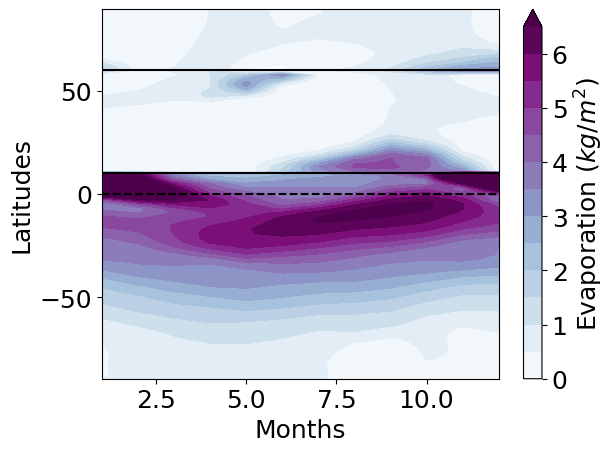

In [46]:

### Meridional Contour Plot for evaporation
plt.figure()
plt.contourf(evap_g_z[50]['time.month'],evap_g_z[50]['lat'],evap_g_z[50].transpose(),cmap="BuPu",extend="max",levels = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5])
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Evaporation $(kg/m^2)$")
plt.savefig(savedir + '/filename.pdf',bbox_inches = 'tight')



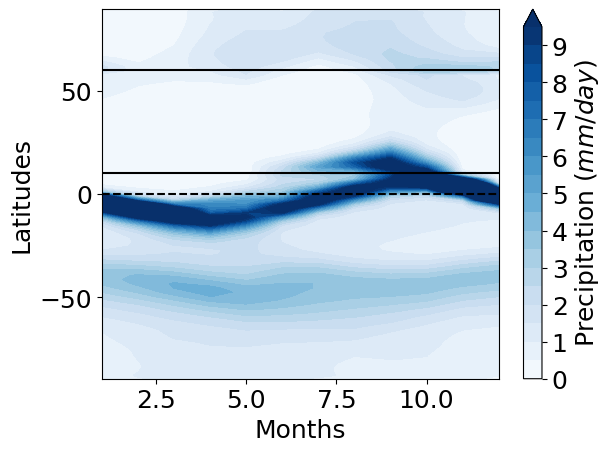

In [48]:

### Meridional Contour Plot for precipitation
plt.figure()
plt.contourf(pr_g_z[50]['time.month'],pr_g_z[50]['lat'],pr_g_z[50].transpose(),cmap="Blues",extend="max",levels = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5])
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Precipitation $(mm/day)$")
plt.savefig(savedir + '/filename.pdf',bbox_inches = 'tight')


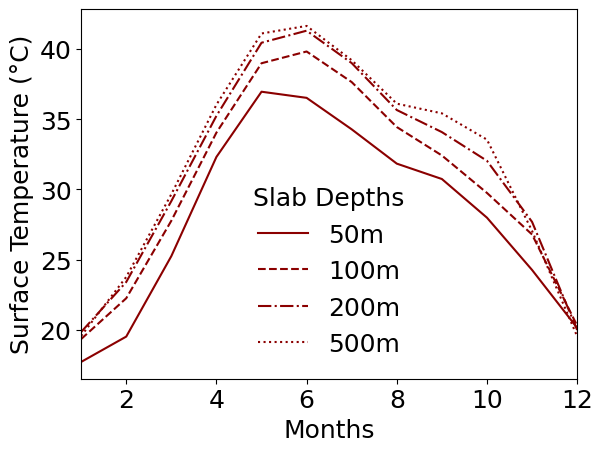

In [50]:
# Monthly averages for selected area throughout the year (surface temperature)
plt.figure()
plt.plot(tsurf_m_z_mean[simulations_list[0]]['time.month'], tsurf_m_z_mean[simulations_list[0]], label=str(simulations_list[0]), linestyle="-", color="darkred")
plt.plot(tsurf_m_z_mean[simulations_list[1]]['time.month'], tsurf_m_z_mean[simulations_list[1]], label=str(simulations_list[1]), linestyle="--", color="darkred")
plt.plot(tsurf_m_z_mean[simulations_list[2]]['time.month'], tsurf_m_z_mean[simulations_list[2]], label=str(simulations_list[2]), linestyle="-.", color="darkred")
plt.plot(tsurf_m_z_mean[simulations_list[3]]['time.month'], tsurf_m_z_mean[simulations_list[3]], label=str(simulations_list[3]), linestyle=":", color="darkred")
plt.xlim([1, 12])
plt.xlabel("Months")
plt.ylabel("Surface Temperature (°C)")
plt.legend(title="Simulatios", frameon=False)
plt.savefig(savedir + '/filename.pdf', bbox_inches='tight')

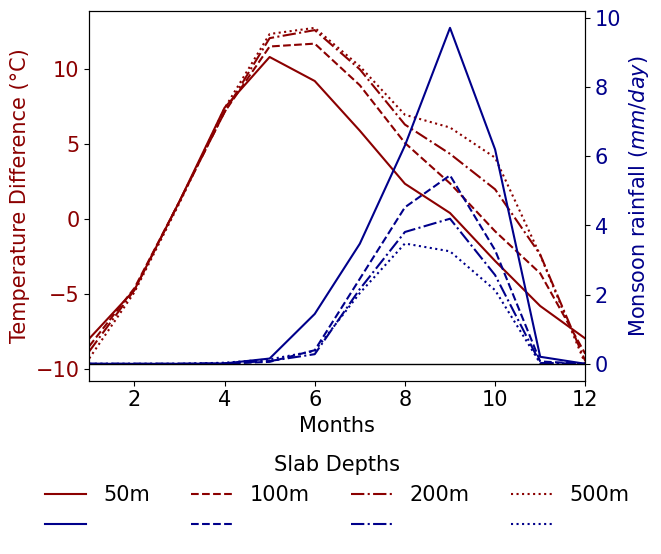

In [54]:

#%% Two variables in one plot 

###  TSURF DIFF + PRECIP
plt.rcParams.update({'font.size': 15})

fig,ax1 = plt.subplots()

#ax2.plot(tsurf_slab1_m_z_mean['time.month'],tsurf_slab1_m_z_mean-273, color = "darkred", label = "5m", linestyle = '-')
ax1.plot(tsurf_m_z_mean[simulations_list[0]]['time.month'],tsurf_m_z_mean[simulations_list[0]], color = "darkred", label = str(simulations_list[0]), linestyle = '-')
ax1.plot(tsurf_m_z_mean[simulations_list[1]]['time.month'],tsurf_m_z_mean[simulations_list[1]], color = "darkred", label = str(simulations_list[1]), linestyle = '--')
ax1.plot(tsurf_m_z_mean[simulations_list[2]]['time.month'],tsurf_m_z_mean[simulations_list[2]], color = "darkred", label = str(simulations_list[2]), linestyle = '-.')
ax1.plot(tsurf_m_z_mean[simulations_list[3]]['time.month'],tsurf_m_z_mean[simulations_list[3]], color = "darkred", label = str(simulations_list[3]), linestyle = ':')
plt.ylabel("Temperature (°C)", color = "darkred")
plt.xlabel("Months")

ax2 = ax1.twinx()
ax2.plot(pr_m_z_mean[simulations_list[0]]['time.month'],pr_m_z_mean[simulations_list[0]], label = str(simulations_list[0]),linestyle = "-", color = "darkblue")
ax2.plot(pr_m_z_mean[simulations_list[1]]['time.month'],pr_m_z_mean[simulations_list[1]], label = str(simulations_list[1]),linestyle = "--", color = "darkblue")
ax2.plot(pr_m_z_mean[simulations_list[2]]['time.month'],pr_m_z_mean[simulations_list[2]], label = str(simulations_list[2]),linestyle = "-.", color = "darkblue")
ax2.plot(pr_m_z_mean[simulations_list[3]]['time.month'],pr_m_z_mean[simulations_list[3]], label = str(simulations_list[3]),linestyle = ":", color = "darkblue")
plt.xlabel("Months")
plt.ylabel("Monsoon rainfall $(mm/day)$", color = "darkblue")

plt.xlabel("Months")
plt.xlim([1,12])

# Create custom legend handles
line1a = mlines.Line2D([], [], color='darkred', linestyle='-', label=str(simulations_list[0]))
line1b = mlines.Line2D([], [], color='darkblue', linestyle='-')
line2a = mlines.Line2D([], [], color='darkred', linestyle='--', label=str(simulations_list[1]))
line2b = mlines.Line2D([], [], color='darkblue', linestyle='--')
line3a = mlines.Line2D([], [], color='darkred', linestyle='-.', label=str(simulations_list[2]))
line3b = mlines.Line2D([], [], color='darkblue', linestyle='-.')
line4a = mlines.Line2D([], [], color='darkred', linestyle=':', label=str(simulations_list[3]))
line4b = mlines.Line2D([], [], color='darkblue', linestyle=':')

# Add the custom handles to the legend
plt.legend(handles=[line1a, line1b, line2a, line2b, line3a, line3b, line4a, line4b], loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, title="Slab Depths", ncol=4)
plt.axhline(0, color = "black", linewidth = 1)
plt.xlabel("Months")
ax2.tick_params(axis='y', labelcolor='darkblue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.savefig(savedir + '/filename.pdf',bbox_inches = 'tight')


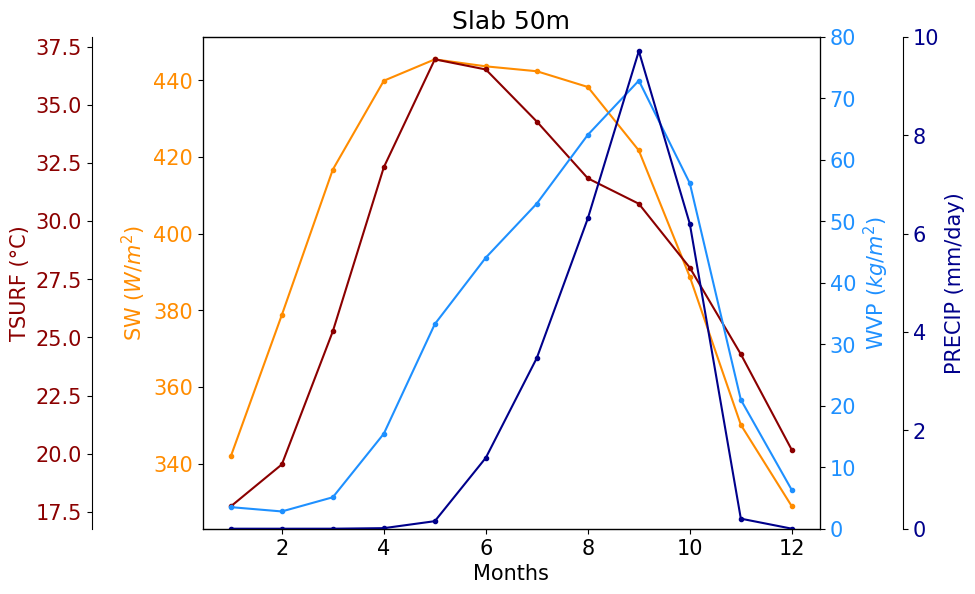

In [100]:

# 4 variables in one plot

fig, ax1 = plt.subplots(figsize=(10, 6)) 

# SW plot
ax1.plot(range(1,13), sw_m_z_mean[50], marker='.', color='darkorange')
ax1.set_ylabel('SW ($W/m^2$)', color='darkorange')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax1.set_xlabel('Months')

# TSURF plot
ax2 = ax1.twinx()
ax2.spines['left'].set_position(('outward', 80))
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.plot(range(1,13), tsurf_m_z_mean[50], marker='.', color='darkred')
ax2.set_ylabel('TSURF (°C)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# WVP plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 0))
ax3.plot(range(1,13), wvp_m_z_mean[50], marker='.', color='dodgerblue')
ax3.set_ylabel('WVP ($kg/m^2$)', color='dodgerblue')
ax3.set_ylim([0, 80])
ax3.tick_params(axis='y', labelcolor='dodgerblue')

# PRECIP plot
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.plot(range(1,13), pr_m_z_mean[50], marker='.', color='darkblue')
ax4.set_ylabel('PRECIP (mm/day)', color='darkblue')
ax4.set_ylim([0, 10])
ax4.tick_params(axis='y', labelcolor='darkblue')

fig.tight_layout()
plt.xlabel('Months')
plt.title('Simulation X')
plt.savefig(savedir + '/filename.pdf', bbox_inches='tight')